<a href="https://colab.research.google.com/github/Ruqyai/Covid-19/blob/master/covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from getpass import getpass
import os

os.environ['KAGGLE_USERNAME'] = input('From the json file, enter the username of your kaggle account: ') #username from the json file
os.environ['KAGGLE_KEY'] = getpass('From the json file, enter the Key: ')  # key from the json file

From the json file, enter the username of your kaggle account: ruqiyas
From the json file, enter the Key: ··········


In [2]:
!kaggle datasets download -d imdevskp/corona-virus-report

 93% 16.0M/17.3M [00:00<00:00, 21.3MB/s]
100% 17.3M/17.3M [00:00<00:00, 23.6MB/s]


In [3]:
!unzip corona-virus-report.zip

Archive:  corona-virus-report.zip
  inflating: country_wise_latest.csv  
  inflating: covid_19_clean_complete.csv  
  inflating: day_wise.csv            
  inflating: full_grouped.csv        
  inflating: usa_county_wise.csv     
  inflating: worldometer_data.csv    


In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import math
import time


from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import Dense
from keras.layers import LSTM


#from sklearn import cross_validation
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler



Using TensorFlow backend.


In [5]:
#!pip install chart_studio

In [6]:
#import chart_studio.plotly as py
#import plotly.graph_objs as go
import plotly.graph_objects as go
from plotly.offline import iplot, plot, download_plotlyjs, init_notebook_mode


In [7]:
# read csv file
dataset = pd.read_csv('covid_19_clean_complete.csv', parse_dates=['Date'], index_col= "Date" )

In [110]:
dataset

,State,Country,Lat,Long,Confirmed,Deaths,Recovered,Active,WHO Region
Date,,,,,,,,,
2020-01-22,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,Eastern Mediterranean
2020-01-22,NaN,Albania,41.153300,20.168300,0,0,0,0,Europe
2020-01-22,NaN,Algeria,28.033900,1.659600,0,0,0,0,Africa
2020-01-22,NaN,Andorra,42.506300,1.521800,0,0,0,0,Europe
2020-01-22,NaN,Angola,-11.202700,17.873900,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...
2020-07-15,NaN,Sao Tome and Principe,0.186400,6.613100,737,14,322,401,Africa
2020-07-15,NaN,Yemen,15.552727,48.516388,1526,433,694,399,Eastern Mediterranean
2020-07-15,NaN,Comoros,-11.645500,43.333300,321,7,302,12,Africa


In [9]:
dataset = dataset.rename(columns= {'Country/Region':'Country','Province/State':'State'})

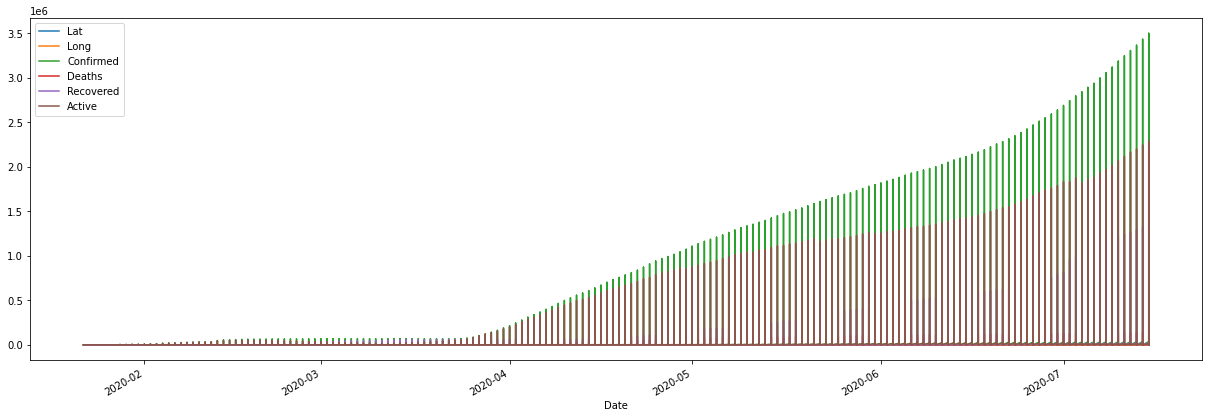

In [10]:
dataset.plot(figsize=(21, 7))

In [11]:

#-------------------Saudi Arabia-----------

saudi_arabia_confirmed=[]
sa_c= dataset[(dataset['Country']== "Saudi Arabia")] ['Confirmed']
saudi_arabia_confirmed.append(sa_c)

saudi_arabia_recovered=[]
sa_r= dataset[(dataset['Country']== "Saudi Arabia")] ['Recovered']
saudi_arabia_recovered.append(sa_r)

saudi_arabia_deaths=[]
sa_d= dataset[(dataset['Country']== "Saudi Arabia")] ['Deaths']
saudi_arabia_deaths.append(sa_d)

#----

saudi_arabia_confirmed= pd.DataFrame(saudi_arabia_confirmed)
saudi_c= saudi_arabia_confirmed.transpose()

saudi_arabia_recovered= pd.DataFrame(saudi_arabia_recovered)
saudi_r= saudi_arabia_recovered.transpose()

saudi_arabia_deaths= pd.DataFrame(saudi_arabia_deaths)
saudi_d= saudi_arabia_deaths.transpose()

#------------------- Thailand --------------

Thailand_confirmed=[]
Thailand_c= dataset[(dataset['Country']== "Thailand")] ['Confirmed']
Thailand_confirmed.append(Thailand_c)

Thailand_recovered=[]
Thailand_r= dataset[(dataset['Country']== "Thailand")] ['Recovered']
Thailand_recovered.append(Thailand_r)

Thailand_deaths=[]
Thailand_d= dataset[(dataset['Country']== "Thailand")] ['Deaths']
Thailand_deaths.append(Thailand_d)

#----

Thailand_confirmed= pd.DataFrame(Thailand_confirmed)
Thailand_c= Thailand_confirmed.transpose()

Thailand_recovered= pd.DataFrame(Thailand_recovered)
Thailand_r= Thailand_recovered.transpose()

Thailand_deaths= pd.DataFrame(Thailand_deaths)
Thailand_d= Thailand_deaths.transpose()

#-------------------Japan ---------------

Japan_confirmed=[]
Japan_c= dataset[(dataset['Country']== "Japan")] ['Confirmed']
Japan_confirmed.append(Japan_c)

Japan_recovered=[]
Japan_r= dataset[(dataset['Country']== "Japan")] ['Recovered']
Japan_recovered.append(Japan_r)

Japan_deaths=[]
Japan_d= dataset[(dataset['Country']== "Japan")] ['Deaths']
Japan_deaths.append(Japan_d)

#-----

Japan_confirmed= pd.DataFrame(Japan_confirmed)
Japan_c= Japan_confirmed.transpose()

Japan_recovered= pd.DataFrame(Japan_recovered)
Japan_r= Japan_recovered.transpose()

Japan_deaths= pd.DataFrame(Japan_deaths)
Japan_d= Japan_deaths.transpose()

#-------------------Italy ----------------

Italy_confirmed=[]
Italy_c= dataset[(dataset['Country']== "Italy")] ['Confirmed']
Italy_confirmed.append(Italy_c)

Italy_recovered=[]
Italy_r= dataset[(dataset['Country']== "Italy")] ['Recovered']
Italy_recovered.append(Italy_r)

Italy_deaths=[]
Italy_d= dataset[(dataset['Country']== "Italy")] ['Deaths']
Italy_deaths.append(Italy_d)

#----

Italy_confirmed= pd.DataFrame(Italy_confirmed)
Italy_c= Italy_confirmed.transpose()

Italy_recovered= pd.DataFrame(Italy_recovered)
Italy_r= Italy_recovered.transpose()

Italy_deaths= pd.DataFrame(Italy_deaths)
Italy_d= Italy_deaths.transpose()

#------------------- Iran --------------


Iran_confirmed=[]
Iran_c= dataset[(dataset['Country']== "Iran")] ['Confirmed']
Iran_confirmed.append(Iran_c)

Iran_recovered=[]
Iran_r= dataset[(dataset['Country']== "Iran")] ['Recovered']
Iran_recovered.append(Iran_r)

Iran_deaths=[]
Iran_d= dataset[(dataset['Country']== "Iran")] ['Deaths']
Iran_deaths.append(Iran_d)

#----

Iran_confirmed= pd.DataFrame(Iran_confirmed)
Iran_c= Iran_confirmed.transpose()

Iran_recovered= pd.DataFrame(Iran_recovered)
Iran_r= Iran_recovered.transpose()

Iran_deaths= pd.DataFrame(Iran_deaths)
Iran_d= Iran_deaths.transpose()


In [140]:
x= saudi_c.index
y0 = saudi_c['Confirmed']
y1 = saudi_r['Recovered']
y2 = saudi_d['Deaths']

y3 = Thailand_c['Confirmed']
y4 = Thailand_r['Recovered']
y5 = Thailand_d['Deaths']


y6 = Japan_c['Confirmed']
y7 = Japan_r['Recovered']
y8 = Japan_d['Deaths']


y12 = Italy_c['Confirmed']
y13 = Italy_r['Recovered']
y14 = Italy_d['Deaths']

y15 = Iran_c['Confirmed']
y16 = Iran_r['Recovered']
y17 = Iran_d['Deaths']


# Create traces
fig = go.Figure()

#---Saudi Arabia----

fig.add_trace(go.Scatter(x=x,y=y0,
                    mode='lines',
                    name='Confirmed-Saudi Arabia'))
fig.add_trace(go.Scatter(x=x,y=y1,
                    mode='lines',
                    name='Recovered-Saudi Arabia'))
fig.add_trace(go.Scatter(x=x,y=y2,
                    mode='lines', name='Deaths-Saudi Arabia'))

#-----Thailand -----

fig.add_trace(go.Scatter(x=x,y=y3,
                    mode='lines',
                    name='Confirmed-Thailand'))
fig.add_trace(go.Scatter(x=x,y=y4,
                    mode='lines',
                    name='Recovered-Thailand'))
fig.add_trace(go.Scatter(x=x,y=y5,
                    mode='lines', name='Deaths-Thailand'))

#----Japan ------

fig.add_trace(go.Scatter(x=x,y=y6,
                    mode='lines',
                    name='Confirmed-Japan'))
fig.add_trace(go.Scatter(x=x,y=y7,
                    mode='lines',
                    name='Recovered-Japan'))
fig.add_trace(go.Scatter(x=x,y=y8,
                    mode='lines', name='Deaths-Japan'))


#----Italy -----

fig.add_trace(go.Scatter(x=x,y=y12,
                    mode='lines',
                    name='Confirmed-Italy'))
fig.add_trace(go.Scatter(x=x,y=y13,
                    mode='lines',
                    name='Recovered-Italy'))
fig.add_trace(go.Scatter(x=x,y=y14,
                    mode='lines', name='Deaths-Italy'))

#----Iran -------

fig.add_trace(go.Scatter(x=x,y=y15,
                    mode='lines',
                    name='Confirmed-Iran'))
fig.add_trace(go.Scatter(x=x,y=y16,
                    mode='lines',
                    name='Recovered-Iran'))
fig.add_trace(go.Scatter(x=x,y=y17,
                    mode='lines', name='Deaths-Iran'))

#---------layout-----------

fig.update_layout(
    title="All cases are updated every 24 hours in many countries (18 July 2020)",
    xaxis_title="Date",
    yaxis_title="Countries")
plot(fig, filename="/content/countries.html", auto_open=False)
fig.show()

In [13]:
fig1 = go.Figure()


#--------Saudi Arabia--------

fig1.add_trace(go.Scatter(x=x,y=y0,
                    mode='lines',
                    name='Confirmed-Saudi Arabia'))
fig1.add_trace(go.Scatter(x=x,y=y1,
                    mode='lines',
                    name='Recovered-Saudi Arabia'))
fig1.add_trace(go.Scatter(x=x,y=y2,
                    mode='lines', name='Deaths-Saudi Arabia'))
fig1.update_layout(
    title="All cases are for Saudi Arabia (18 July 2020)",
    xaxis_title="Date",
    yaxis_title="Saudi Arabia")
plot(fig1, filename="/content/sa.html", auto_open=False)
fig1.show()


In [139]:
df= dataset


colors = ['rgb(239,243,255)','rgb(189,215,231)','rgb(107,174,214)','rgb(33,113,181)']

fig = go.Figure()

fig.add_trace(go.Choropleth(
        locationmode = 'country names',
        locations = dataset['Country'],
        z = dataset.last('1D')['Confirmed'],
        text = dataset.last('1D')['Recovered'],
        colorscale = [[0,'rgb(0, 0, 0)'],[1,'rgb(0, 0, 0)']],
        autocolorscale = True,
        showscale = True,
        geo = 'geo2'
    ))


fig.update_layout(
    title = go.layout.Title(
        text = 'Covid-19 cases (  18 July 2020)'),
    geo = go.layout.Geo(
        resolution = 50,
        scope = 'world',
        showframe = False,
        showcoastlines = False,
        landcolor = "rgb(229, 229, 229)",
        countrycolor = "white" ,
        coastlinecolor = "white",
        projection_type = 'equirectangular',#'mercator',
        lonaxis_range= [ -100.0, -150.0 ],
        lataxis_range= [ 0.0, 12.0 ],
        lataxis = dict(range=[40,70]),
        lonaxis = dict(range=[-130,-55]),
        domain = dict(x = [ 0, 1 ], y = [ 0, 1 ])
    ),
    geo2 = go.layout.Geo(
        scope = 'world',
        showframe = False,
        landcolor = "rgb(229, 229, 229)",
        showcountries = False,
        domain = dict(x = [ 0, 1 ], y = [ 0, 1 ]),
        bgcolor = 'rgba(255, 255, 255, 0.0)',
    ),
    
    legend_traceorder = 'reversed'
)
plot(fig, filename="/content/map.html", auto_open=False)
fig.show()

![alt text](https://raw.githubusercontent.com/Ruqyai/Covid-19/master/images%26pages/sa.png)
[Saudi Arabia](https://ruqyai.github.io/Covid-19/images%26pages/sa.html)
![alt text](https://raw.githubusercontent.com/Ruqyai/Covid-19/master/images%26pages/coun.png)
[Many Countries](https://ruqyai.github.io/Covid-19/images%26pages/countries.html)
![alt text](https://raw.githubusercontent.com/Ruqyai/Covid-19/master/images%26pages/map.png)
[The Word Map](https://ruqyai.github.io/Covid-19/images%26pages/map.html)


### Creating LSTM model

In [15]:
scaler = MinMaxScaler() 

In [16]:
data_set = MinMaxScaler.fit_transform(scaler, saudi_c) 

In [17]:
def timeDelay(data, delay):
    X_data, y_data = [], []
    #naive version, vectorized version can be implemented,
    #but may run out of memory,
    for i in range(delay, len(data)):
        X_data.append(data[i - (delay):i].tolist())
    X_data = np.array(X_data)
    y_data = data[delay:]
    return np.reshape(X_data, (X_data.shape[0], X_data.shape[1], 1)), np.reshape(y_data, (len(y_data),))

In [18]:

def model():
    model = Sequential()
    model.add(LSTM(5000,input_shape=(3, 1), dropout=0.2))
    model.add(Dense(1))
    start = time.time()
    model.compile(loss="mse", optimizer="rmsprop")
    print ("Compilation Time : ", time.time() - start)
    return model

### Define parameters

In [19]:
ratio = 0.8 # Training test ratio
d = 3 # Delay
X, y = timeDelay(data_set, d)
n = int(ratio * len(X))

In [20]:
X_train, y_train = X[:n], y[:n]
X_test, y_test = X[n:], y[n:]

In [ ]:
print(X_test)

In [ ]:
print(y_test)

In [23]:
model = model()

Compilation Time :  0.010272026062011719


In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 5000)              100040000 
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5001      
Total params: 100,045,001
Trainable params: 100,045,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs=500, batch_size=32, verbose=2)

In [26]:
baseline_testScore = scaler.inverse_transform(np.array([[mean_squared_error(y_test[:], y_test[:])**.5]]))
trainScore = scaler.inverse_transform(np.array([[model.evaluate(X_train, y_train, verbose=0)**.5]]))
testScore = scaler.inverse_transform(np.array([[model.evaluate(X_test, y_test, verbose=0)**.5]]))

print('baseline test score = %.2f RMSE' % baseline_testScore)
print('train score = %.2f RMSE' % trainScore)
print('test score = %.2f RMSE' % testScore)

baseline test score = 0.00 RMSE
train score = 9500.78 RMSE
test score = 26632.65 RMSE


In [27]:
# generate predictions
y_train_pred = model.predict(X_train)

In [28]:
y_test_pred = model.predict(X_test)

In [ ]:
print(X_test)

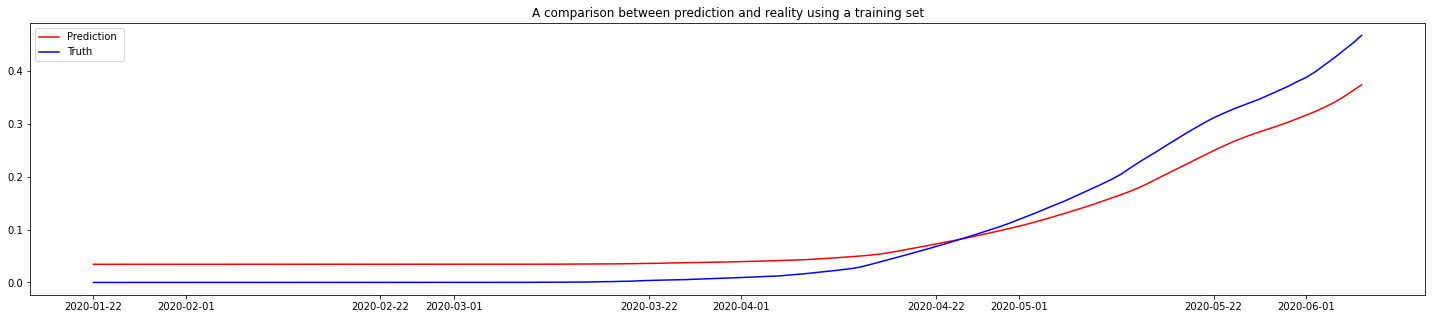

In [30]:
train_shape=y_train.shape[0]
plt.figure(figsize=(25, 5))
plt.plot( saudi_c.index[:train_shape],y_train_pred, color='red', label='Prediction ')
plt.plot(saudi_c.index[:train_shape], y_train, color='blue', label='Truth ')
plt.legend(loc='upper left')
plt.title("A comparison between prediction and reality using a training set")
plt.show()

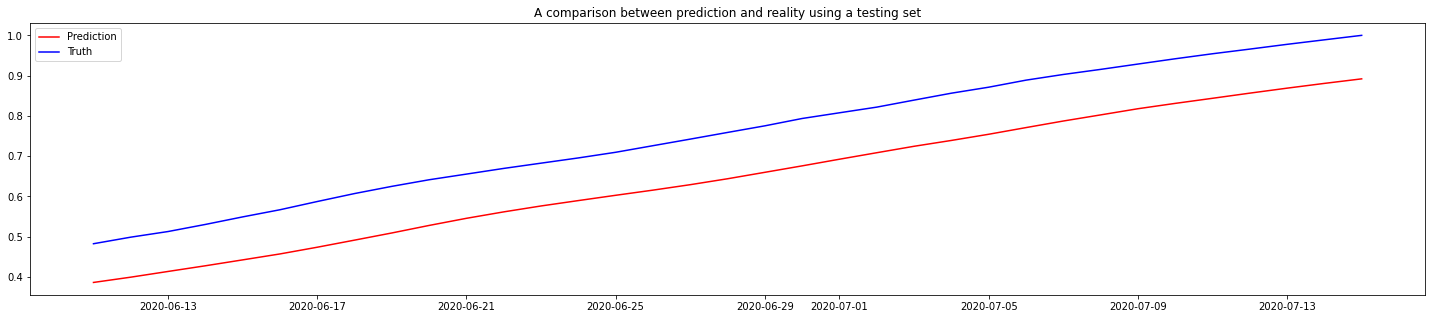

In [31]:
test_shape=y_test.shape[0]
plt.figure(figsize=(25, 5))
plt.plot(saudi_c.index[-test_shape:], y_test_pred, color='red', label='Prediction')
plt.plot( saudi_c.index[-test_shape:], y_test, color='blue', label='Truth')
plt.legend(loc='upper left')
plt.title("A comparison between prediction and reality using a testing set")
plt.show()

In [ ]:
y_train_p = scaler.inverse_transform(y_train_pred)
print(y_train_p)

In [ ]:
X_train_reshape= X_train.reshape(-1, 1)
X_train_transform=  scaler.inverse_transform(X_train_reshape) 
print(X_train_transform)

In [ ]:
y_test_p = scaler.inverse_transform(y_test_pred)
print(y_test_p)

In [ ]:
y_test_reshape= y_test.reshape(-1, 1)
y_test_transform=  scaler.inverse_transform(y_test_reshape) 
print(y_test_transform)

In [47]:
index = pd.date_range('2020-4-11', freq='D', periods=3)
index

DatetimeIndex(['2020-04-11', '2020-04-12', '2020-04-13'], dtype='datetime64[ns]', freq='D')

In [127]:
# demonstrate prediction

x_input = np.array([[3287],[3651],[4033]])
x_input_t = scaler.transform(x_input)
x_input_r = x_input_t.reshape((-1, 3,1))
yhat = model.predict(x_input_r)
p_yhat = scaler.inverse_transform(yhat)
print('The forecasting of cases is:{}'.format(int(p_yhat[0][0])))

The forecasting of cases is:10607


In [ ]:
pred_1=pd.DataFrame(y_train_p)
pred_2=pd.DataFrame(y_test_p)
pred_all= pred_1.append(pred_2, ignore_index=True)
pred_all= pred_all.astype(int)
pred_all.columns=['col']
pred_all

In [112]:
saudi_c['Prediction'][3:]=pred_all['col'].values
saudi_c

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Confirmed,Prediction
Date,,
2020-01-22,0,NaN
2020-01-23,0,NaN
2020-01-24,0,NaN
2020-01-25,0,8253.0
2020-01-26,0,8253.0
...,...,...
2020-07-11,229480,202879.0
2020-07-12,232259,205957.0
2020-07-13,235111,208933.0


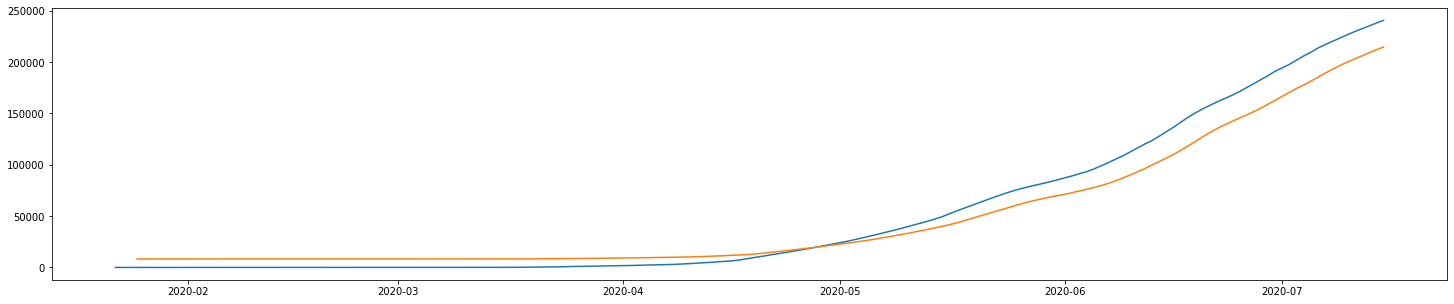

In [118]:
plt.figure(figsize=(25, 5))
plt.plot(saudi_c)

In [38]:
'''
from google.colab import drive
drive.mount('/content/drive')
'''

"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

In [39]:
#%cd /content/drive/My\ Drive/

In [40]:
# serialize weights to HDF5
model.save("model_covid.h5")
print("Saved model to disk")

Saved model to disk


In [41]:
# load weights into new model
from keras.models import load_model
loaded_model = load_model("model_covid.h5")
print("Loaded model from disk")

Loaded model from disk


In [141]:
x_input_loaded = np.array([[3287],[3651],[4033]])
x_input_t_loaded = scaler.transform(x_input_loaded)
x_input_r_loaded = x_input_t_loaded.reshape((-1, 3,1))
yhat_loaded = loaded_model.predict(x_input_r_loaded)
p_yhat_loaded = scaler.inverse_transform(yhat_loaded)
print('The forecasting of cases is:{}'.format(int(p_yhat_loaded[0][0])))

The forecasting of cases is:10607


In [ ]:
!pip install tensorflowjs 

In [128]:
!mkdir model
!tensorflowjs_converter --input_format keras model_covid.h5 model/

In [ ]:
!zip -r model.zip model 

In [130]:
from google.colab import files
files.download('model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>